In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Customers.csv')
data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


## *basics statistics for every column*

In [32]:
male_customers = data[data['Gender'] == 'Male']['Gender'].count()
female_customers = data[data['Gender'] == 'Female']['Gender'].count()

print('number of male customers:', male_customers, '\nnumber of female customers:', female_customers)

number of male customers: 814 
number of female customers: 1186


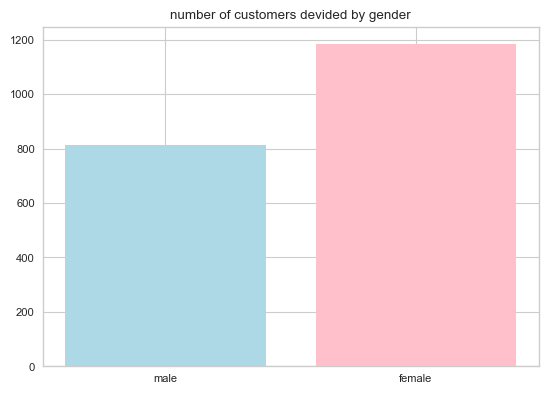

In [72]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.bar(['male', 'female'], [male_customers, female_customers], color=['lightblue', 'pink']);
plt.title('number of customers devided by gender');

In [69]:
age_avg = np.average(data.Age)
age_std = np.std(data.Age)
age_median = np.median(data.Age)

print('average:',age_avg, '\nstandard normal deviation:',age_std, '\nmedian:',age_median)

average: 48.96 
standard normal deviation: 28.42263886411675 
median: 48.0


In [85]:
mans_age = data[data['Gender'] == 'Male']['Age']
man_age_avg = np.average(mans_age)
man_age_std = np.std(mans_age)
man_age_median = np.median(mans_age)

print('average:',man_age_avg, '\nstandard normal deviation:',man_age_std, '\nmedian:',man_age_median)
print("==="*15)

females_age = data[data['Gender'] == 'Female']['Age']
female_age_avg = np.average(females_age)
female_age_std = np.std(females_age)
female_age_median = np.median(females_age)

print('average:',female_age_avg, '\nstandard normal deviation:',female_age_std, '\nmedian:',female_age_median)

average: 49.15970515970516 
standard normal deviation: 28.66816926752384 
median: 48.0
average: 48.822934232715006 
standard normal deviation: 28.252069663905278 
median: 48.0


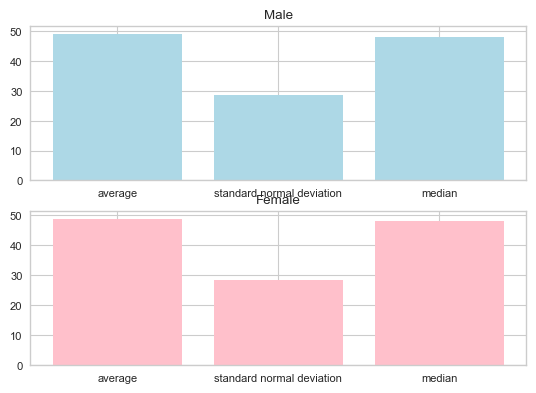

In [175]:
fig, axis = plt.subplots(2,1)
axis[0].bar(['average', 'standard normal deviation', 'median'], [man_age_avg, man_age_std, man_age_median], color='lightblue');
axis[0].set_title('Male');
axis[1].bar(['average', 'standard normal deviation', 'median'], [female_age_avg, female_age_std, female_age_median], color='pink');
axis[1].set_title('Female');

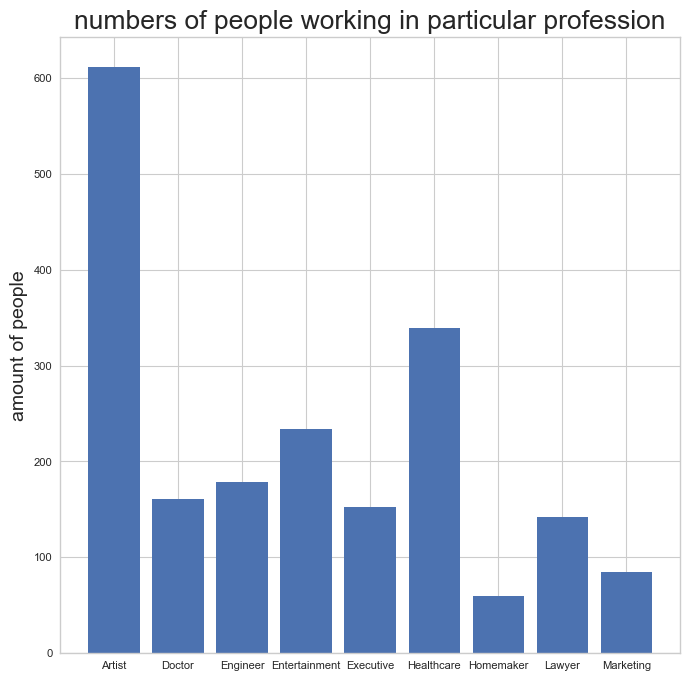

In [194]:
professions = pd.DataFrame(data.groupby('Profession')['Gender'].count())
plt.figure(figsize=(8,8));
plt.bar(professions.index, professions.Gender);
plt.title('numbers of people working in particular profession', fontsize=19);
plt.ylabel('amount of people', fontsize=14);

In [179]:
data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


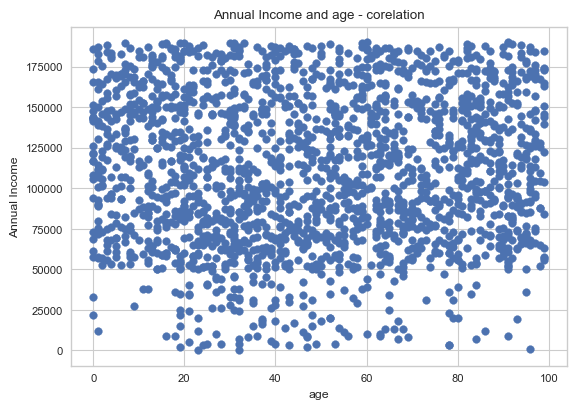

In [195]:
# what we see here is noice and we couldn't see any pattern, so I suppose that data is generated
plt.scatter(data['Age'], data['Annual Income ($)']);
plt.title('Annual Income and age - corelation');
plt.xlabel('age');
plt.ylabel('Annual Income');

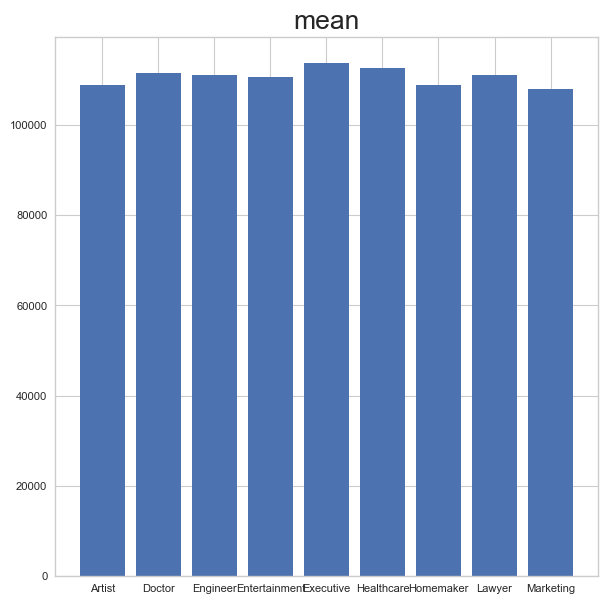

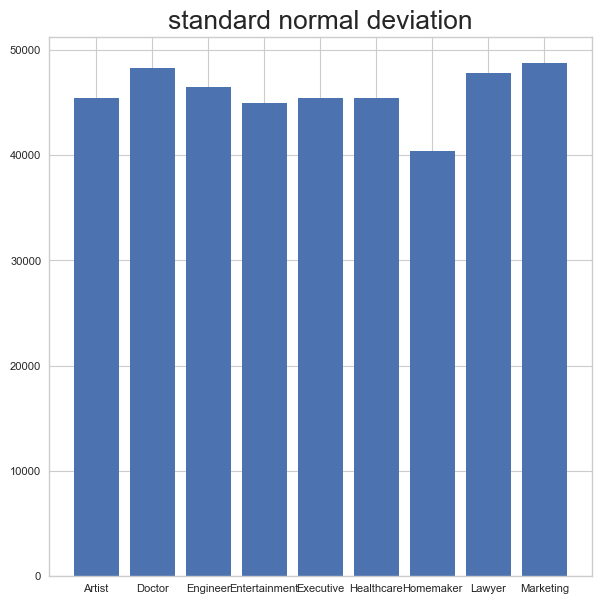

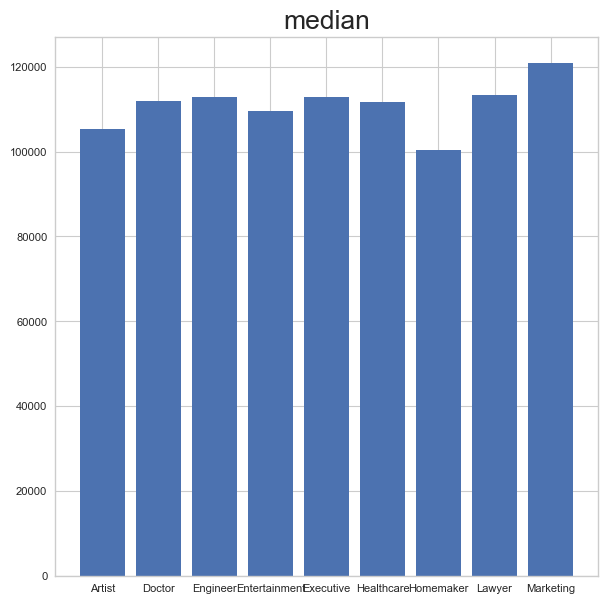

In [273]:
mean = data.groupby('Profession')['Annual Income ($)'].mean()
std = data.groupby('Profession')['Annual Income ($)'].std()
median = data.groupby('Profession')['Annual Income ($)'].median()

mean_fig = plt.figure(1, figsize=(7,7))
plt.bar(mean.index, mean);
plt.title('mean', fontsize=19);

std_fig = plt.figure(2, figsize=(7,7))
plt.bar(std.index, std);
plt.title('standard normal deviation', fontsize=19);

median_fig =  plt.figure(3, figsize=(7,7))
plt.bar(median.index, median);
plt.title('median', fontsize=19);


In [293]:
data.groupby('Profession')['Age'].agg(['min', 'mean', 'max', 'median', 'std'])

Profession
Artist           49.004902
Doctor           46.621118
Engineer         55.094972
Entertainment    51.162393
Executive        46.601307
Healthcare       47.843658
Homemaker        45.366667
Lawyer           47.753521
Marketing        45.823529
Name: Age, dtype: float64

In [298]:
%matplotlib inline 

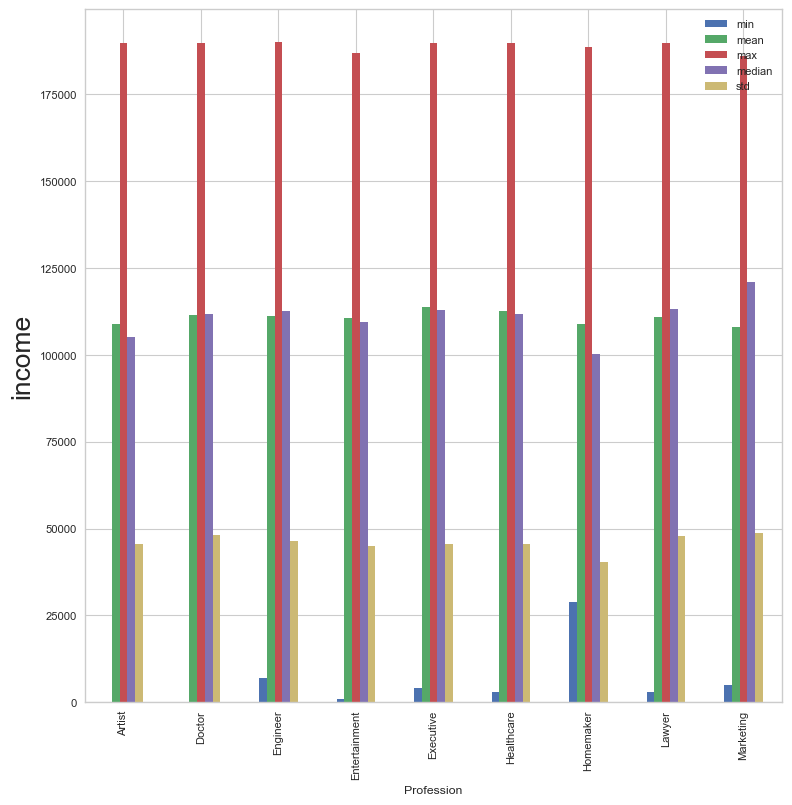

In [310]:
data.groupby('Profession')['Annual Income ($)'].agg(['min', 'mean', 'max', 'median', 'std']).plot(kind='bar', figsize=(9,9))
plt.ylabel('income', fontsize=19);

In [329]:
data.Profession = data.Profession.replace('no job', 'unknown')

In [334]:
data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


# *Create ready to see raport with most usefull informations*

In [361]:
import sweetviz
analyse = sweetviz.analyze(data)
raport = sweetviz.DataframeReport(data)

                                             |                                             | [  0%]   00:00 ->…

                                             |                                             | [  0%]   00:00 ->…

ValueError: `bins` must increase monotonically, when an array

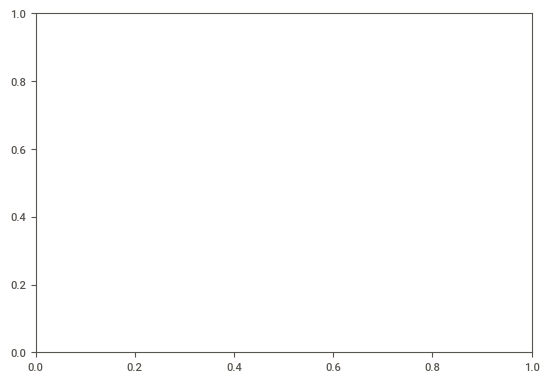

In [383]:
plt.hist(data['Annual Income ($)'], bins=sodata['Age'])